In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
img_height = 224
img_width = 224
channels = 3
nb_classes = 4

In [0]:
X_train = np.load("drive/My Drive/AD_data/X_train.npy")
y_train= np.load("drive/My Drive/AD_data/y_train.npy")
X_test = np.load("drive/My Drive/AD_data/X_test.npy")
y_test= np.load("drive/My Drive/AD_data/y_test.npy")

In [0]:
X_train.shape

(2240, 224, 224, 3)

In [0]:
X_train=X_train.reshape(X_train.shape[0],img_height,img_width,channels)
X_test=X_test.reshape(X_test.shape[0],img_height,img_width,channels)

In [0]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [0]:
X_train=X_train/255
X_test=X_test/255

In [0]:
y_train=to_categorical(y_train,nb_classes)
y_test=to_categorical(y_test,nb_classes)

In [0]:
classifier = Sequential()

classifier.add(Convolution2D(32, kernel_size = [3, 3], input_shape = (img_height, img_width, channels), activation = "relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Convolution2D(64, kernel_size = [3, 3], activation = "relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Convolution2D(128, kernel_size = [3, 3], activation = "relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Convolution2D(256, kernel_size = [3, 3], activation = "relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Convolution2D(128, kernel_size = [3, 3], activation = "relu"))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


classifier.add(Flatten())

classifier.add(Dense(units = 1000, activation = "relu"))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 250, activation = "relu"))
classifier.add(Dropout(0.2))
classifier.add(Dense(units = 4, activation = "softmax"))

In [0]:
classifier.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ['accuracy'])

In [0]:
es = EarlyStopping(monitor = 'val_loss', min_delta = 0.005, patience = 4, restore_best_weights = True)

In [0]:
classifier.fit(X_train, y_train, batch_size=32,
              steps_per_epoch=len(X_train) / 32,
              validation_data=(X_test, y_test),
              epochs=40,
              callbacks = [es])

Epoch 1/40
70/70 [==============================] - 3s 46ms/step - loss: 1.1373 - accuracy: 0.4518 - val_loss: 0.8552 - val_accuracy: 0.6375
Epoch 2/40
70/70 [==============================] - 3s 44ms/step - loss: 0.7686 - accuracy: 0.6621 - val_loss: 0.6621 - val_accuracy: 0.7000
Epoch 3/40
70/70 [==============================] - 3s 44ms/step - loss: 0.6592 - accuracy: 0.7027 - val_loss: 0.7300 - val_accuracy: 0.6625
Epoch 4/40
70/70 [==============================] - 3s 44ms/step - loss: 0.5750 - accuracy: 0.7397 - val_loss: 0.5047 - val_accuracy: 0.7625
Epoch 5/40
70/70 [==============================] - 3s 43ms/step - loss: 0.5012 - accuracy: 0.7795 - val_loss: 0.4898 - val_accuracy: 0.8052
Epoch 6/40
70/70 [==============================] - 3s 44ms/step - loss: 0.4160 - accuracy: 0.8246 - val_loss: 0.3616 - val_accuracy: 0.8438
Epoch 7/40
70/70 [==============================] - 3s 44ms/step - loss: 0.3076 - accuracy: 0.8808 - val_loss: 0.3321 - val_accuracy: 0.8573
Epoch 8/40
70

In [0]:
y_pred = classifier.predict(X_test)
score = classifier.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.1282188594341278
Test accuracy: 0.9583333134651184


In [0]:
y_pred = classifier.predict(X_test)
score = classifier.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

y_pred = [np.argmax(y) for y in y_pred]
y_test = [np.argmax(y) for y in y_test]

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')


print("Precision: ", precision)
print("Recall: ", recall)

Test score: 0.1282188594341278
Test accuracy: 0.9583333134651184
Precision:  0.958713258662727
Recall:  0.9583333333333334


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       253
           1       1.00      1.00      1.00       216
           2       0.94      0.92      0.93       248
           3       0.93      0.97      0.95       243

    accuracy                           0.96       960
   macro avg       0.96      0.96      0.96       960
weighted avg       0.96      0.96      0.96       960



In [0]:
from sklearn.metrics import confusion_matrix
results = confusion_matrix(y_test, y_pred)
print(results)

[[240   0   8   5]
 [  0 216   0   0]
 [  5   0 229  14]
 [  2   0   6 235]]


In [0]:
classifier.save("drive/My Drive/AD_data/ExpCNN95.83.h5")

In [0]:
from tensorflow.keras.models import load_model
loaded_model = load_model("drive/My Drive/AD_data/ExpCNN95.83.h5")

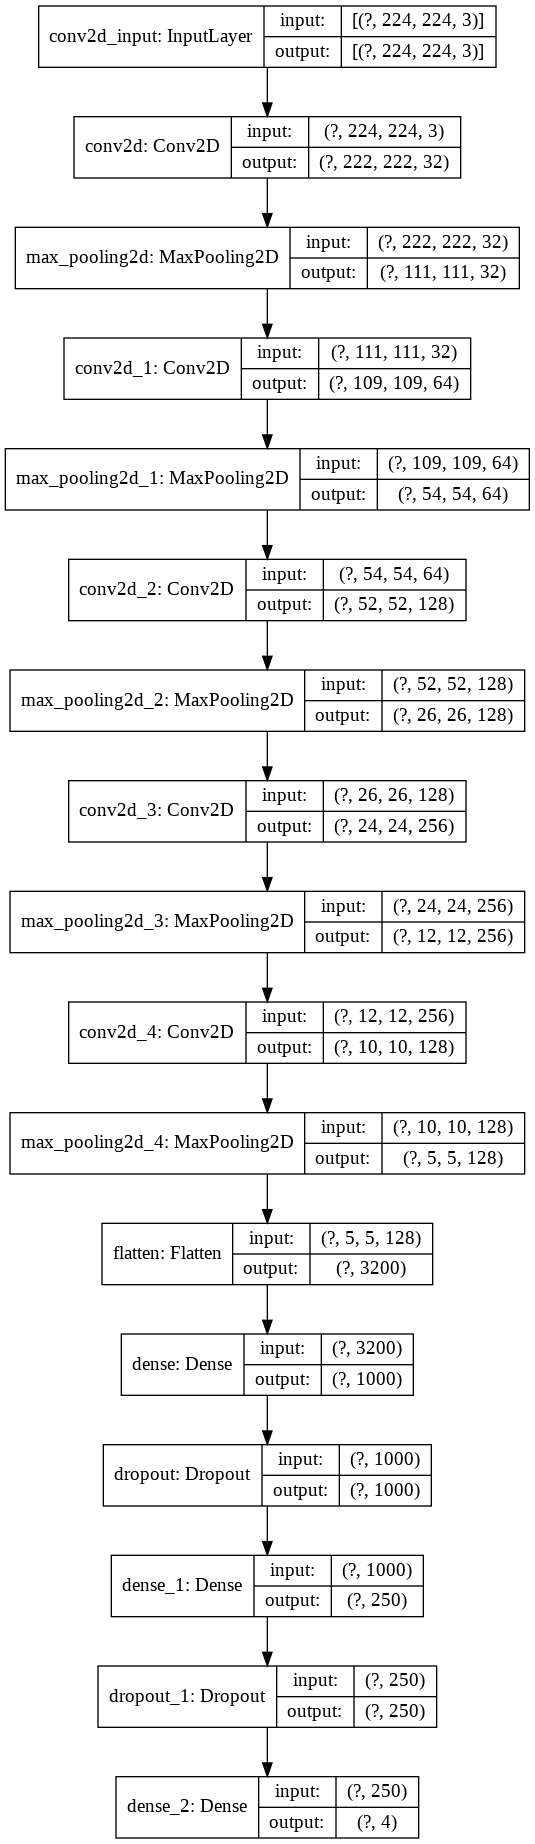

In [0]:
from tensorflow.keras.utils import plot_model
plot_model(loaded_model, to_file="drive/My Drive/AD_data/Model_final.png", show_shapes=True, show_layer_names=True)

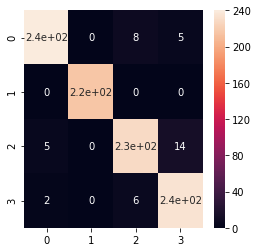

In [2]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
#original
array=[[ 240 ,  0,   8,   5],
 [  0,  216,   0,   0],
 [  5,   0,  229,   14],
 [  2,   0,   6, 235]]
df_cm = pd.DataFrame(array)
plt.figure(figsize = (4,4))
sn.heatmap(df_cm, annot=True)